In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylops

from scipy import linalg as la
from scipy import sparse

from trips.io import build_x_true
from trips.operators import gaussian_blur_operator, first_derivative_operator
from trips.solvers.GKS import *

import h5py

### construct a true image

In [3]:
from scipy.io import loadmat

A = loadmat('./data/shape_data/Amat.mat')['AA']
b = loadmat('./data/shape_data/bn.mat')['b']

FileNotFoundError: [Errno 2] No such file or directory: './data/shape_data/Amat.mat'

### construct regularization operators

In [3]:
I = pylops.Identity(4096) # identity operator
D = first_derivative_operator(n=4096) # first derivative operator
D2 = D @ D # second derivative operator

In [4]:
regvals = [20*(0.99**(x)) for x in range(0,80)]

### run GKS with GCV

In [17]:
(x, x_history, lambdah, lambda_history) = GKS(A, b, D, regparam='gcv', projection_dim=3, iter=80, tol=10**(-16))

running GKS...: 100%|██████████| 80/80 [00:21<00:00,  3.78it/s]


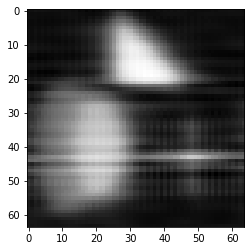

In [18]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

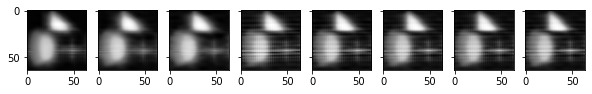

In [19]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

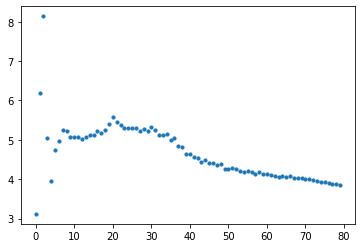

In [20]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)

### run GKS with DP

In [21]:
(x, x_history, lambdah, lambda_history) = GKS(A, b, D, projection_dim=3, iter=80, regparam='dp', eta=1.01, delta=0.015071642283307, tol=10**(-16))

running GKS...: 100%|██████████| 80/80 [00:08<00:00,  9.51it/s]


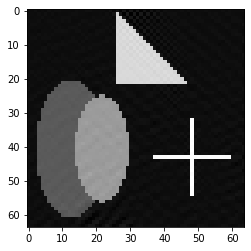

In [22]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

In [10]:
lambda_history

[0.2929088623838975,
 0.6839051764559869,
 0.21489652058872802,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [11]:
lambdah

0.0

In [12]:
(x, x_history, lambdah, lambda_history) = GKS(A, b, I, regparam=regvals, projection_dim=3, iter=80, tol=10**(-16))

running GKS...: 100%|██████████| 80/80 [00:05<00:00, 13.94it/s]


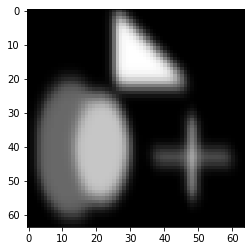

In [13]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

In [14]:
regvals

[20.0,
 19.8,
 19.602,
 19.40598,
 19.211920199999998,
 19.019800997999997,
 18.82960298802,
 18.641306958139797,
 18.454893888558402,
 18.27034494967282,
 18.087641500176087,
 17.906765085174328,
 17.727697434322586,
 17.550420459979357,
 17.374916255379564,
 17.20116709282577,
 17.02915542189751,
 16.858863867678537,
 16.69027522900175,
 16.52337247671173,
 16.358138751944615,
 16.19455736442517,
 16.03261179078092,
 15.872285672873108,
 15.713562816144375,
 15.556427187982933,
 15.400862916103101,
 15.246854286942071,
 15.094385744072651,
 14.943441886631923,
 14.794007467765605,
 14.64606739308795,
 14.499606719157068,
 14.354610651965498,
 14.211064545445842,
 14.068953899991383,
 13.92826436099147,
 13.788981717381555,
 13.651091900207739,
 13.514580981205661,
 13.379435171393606,
 13.24564081967967,
 13.113184411482873,
 12.982052567368044,
 12.852232041694363,
 12.72370972127742,
 12.596472624064646,
 12.470507897824,
 12.345802818845758,
 12.2223447906573,
 12.100121342750727,